# Orthogonalized vector space tutorial

In this tutorial you will learn:
- How to construct a vector space that is orthonormal in a custom inner product

In [22]:
#First, let's import the relavant modules:
import romtools
import numpy as np
from matplotlib import pyplot as plt
from romtools import vector_space

In [23]:
#Now, we will load in snapshots from a FOM. Here, we use pre-computed snapshots of the 1D Euler equations obtained using pressio-demo-apps
snapshots = np.load('snapshots.npz')['snapshots']

## The snapshots are in tensor form:
n_vars, nx, nt = snapshots.shape
## Note that romtools works with tensor forms (https://pressio.github.io/rom-tools-and-workflows/romtools/vector_space.html)

In [24]:
# As an example, we want to create a basis that is orthonormal w.r.p. to the cell volumes.
# In this example, the cell volume was dx = 1/500
dx = 1./500

#We will create a vector the size of a single snapshot that we wish to orthogonalize against
w = np.ones(snapshots[...,0].size)*dx

#Now, we will create an orthogonalizer:
#(https://pressio.github.io/rom-tools-and-workflows/romtools/vector_space/utils/orthogonalizer.html)
my_orthogonalizer = vector_space.utils.EuclideanVectorWeightedL2Orthogonalizer(w)

#Like the last tuorial, let's create a truncater that controls for how we want to truncate our basis.
my_truncater = vector_space.utils.EnergyBasedTruncater(0.999)

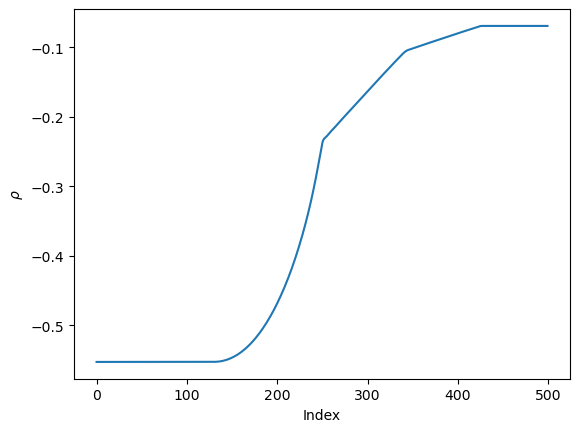

In [21]:
#Now, let's construct a vector space using POD with our truncater and orthogonalizer
my_vector_space = vector_space.VectorSpaceFromPOD(snapshots,truncater=my_truncater,orthogonalizer=my_orthogonalizer)

##It's important to note that we do not do a deep copy of the snapshot matrix for performance reasons.
##Once you pass us the snapshot tensor, we will modify the data in place. 

#We can view the basis and shift vector:
basis = my_vector_space.get_basis()
shift_vector = my_vector_space.get_shift_vector()

#We can look at the density component of the first basis:
plt.plot(basis[0,:,0])
plt.xlabel(r'Index')
plt.ylabel(r'$\rho$')
plt.show()

In [25]:
# We can check that the basis is orthonormal in the desired inner product:
w = w.reshape(basis[...,0].shape)
is_identity = np.einsum('ijk,ij,ijl->kl',basis,w,basis)
assert(np.allclose(is_identity,np.eye(my_vector_space.extents()[-1])))